In [1]:
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



conn = pyodbc.connect(
    r"DRIVER={ODBC Driver 17 for SQL Server};"
    r"SERVER=LAPTOP-H87LRCI6\SQLEXPRESS01;"  
    r"DATABASE=StudentMentalHealthDB1;"
    r"Trusted_Connection=yes;"         
)

query = "SELECT * FROM StudentData"
df = pd.read_sql(query, conn)

df


C:\Users\Naisarg\AppData\Local\Temp\ipykernel_32756\831079963.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,id,new_id,Gender,Age,City,Profession,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Have_you_ever_had_suicidal_thoughts,Work_Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression,Job_Satisfactionn
0,2,1,Male,33,Visakhapatnam,Student,5,0,8.97,2,0.0,5.5,Healthy,B.Pharm,True,3,1,False,True,0
1,8,2,Female,24,Bangalore,Student,2,0,5.90,5,0.0,5.5,Moderate,BSc,False,3,2,True,False,0
2,26,3,Male,31,Srinagar,Student,3,0,7.03,5,0.0,4.0,Healthy,BA,False,9,1,True,False,0
3,30,4,Female,28,Varanasi,Student,3,0,5.59,2,0.0,7.5,Moderate,BCA,True,4,5,True,True,0
4,32,5,Female,25,Jaipur,Student,4,0,8.13,3,0.0,5.5,Moderate,M.Tech,True,1,1,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27858,140685,27897,Female,27,Surat,Student,5,0,5.75,5,0.0,5.5,Unhealthy,Class 12,True,7,1,True,False,0
27859,140686,27898,Male,27,Ludhiana,Student,2,0,9.40,3,0.0,4.0,Healthy,MSc,False,0,3,True,False,0
27860,140689,27899,Male,31,Faridabad,Student,3,0,6.61,4,0.0,5.5,Unhealthy,MD,False,12,2,False,False,0
27861,140690,27900,Female,18,Ludhiana,Student,5,0,6.88,2,0.0,4.0,Healthy,Class 12,True,10,5,False,True,0


Sleep Duration vs Depression

   Sleep_Duration  Depression  count_per_groups
0             4.0       False              2948
1             4.0        True              5357
2             5.5       False              2665
3             5.5        True              3513
4             7.5       False              2971
5             7.5        True              4367
6             9.0       False              2965
7             9.0        True              3077


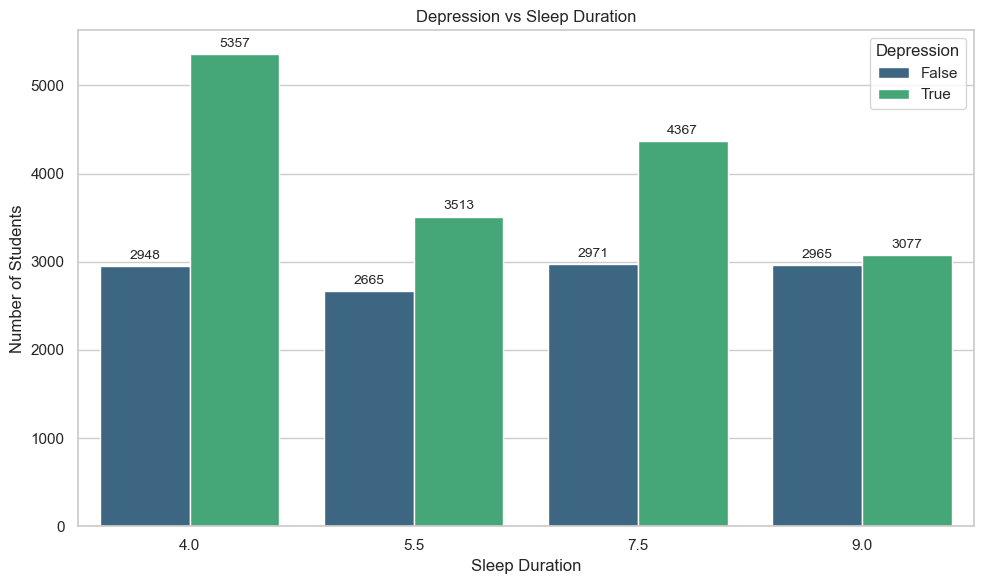

'\nSleep patterns show a strong link to mental health. Students sleeping less than 6 hours are disproportionately affected by depression, while those with longer sleep durations show lower depression rates—highlighting sleep as a critical wellness factor.\n'

In [2]:

grouped = df.groupby(['Sleep_Duration', 'Depression']).size().reset_index(name='count_per_groups')
#group by [sd,d] : group the df basesd on two unique combinatin of sd and d
#size-> how many rows fall into each group
#by efault after groping the column [sd,d] beocme theh index
#rset index bring them back as normal colummn and name count as "count per gorup"
#groop->count-> reset->rename

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax=sns.barplot(
    data=grouped,
    x='Sleep_Duration',
    y='count_per_groups',
    hue='Depression',
    palette='viridis'
)

#hue-> data ke sath differntiat karna he
#iif no used hue -> so only show 4.0 and like that 
#hue-> kis se differnatei karna hhe 
'''hue parameter is used to add a categorical dimension (color separation) to your plot — meaning it helps you visually distinguish data points belonging to different categories by using different colors.'''

#if hue used so work like drepurss has 2 value : yes and no so differiate accoridng that

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

#fmt-> show how the value display ,similar to python string
#label-type-> decides where the label appearas on the bar [edge,center]
print(grouped)
plt.title('Depression vs Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Number of Students')
plt.legend(title='Depression')
plt.tight_layout()
plt.show()

'''
Sleep patterns show a strong link to mental health. Students sleeping less than 6 hours are disproportionately affected by depression, while those with longer sleep durations show lower depression rates—highlighting sleep as a critical wellness factor.
'''


   Sleep_Duration  Depression  count_Per_Group
0             4.0       False             2948
1             4.0        True             5357
2             5.5       False             2665
3             5.5        True             3513
4             7.5       False             2971
5             7.5        True             4367
6             9.0       False             2965
7             9.0        True             3077


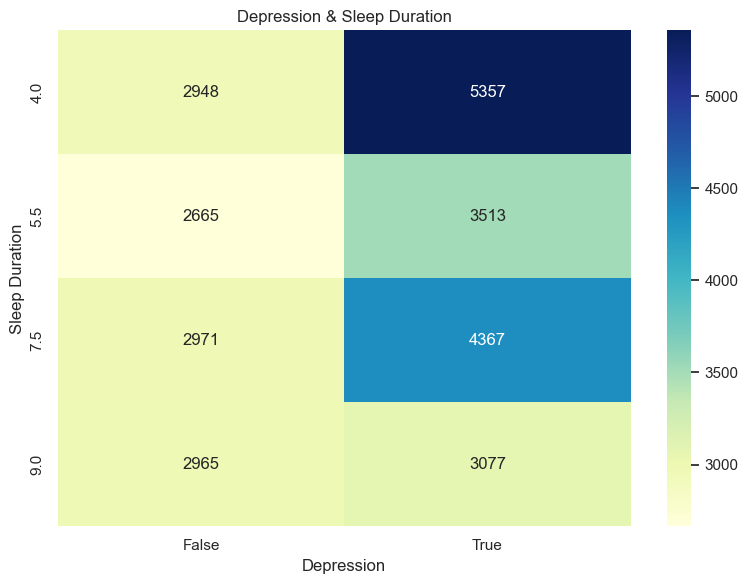

In [3]:
grouped = df.groupby(['Sleep_Duration', 'Depression']).size().reset_index(name='count_Per_Group')

#2 col
#each unique combination of sleep duration and depuression beocme a seperate group
#size() : how many rows in each group
#group() + size() -> product sesrires with multi-index(the group column beocme the index
#reset_index() => convert multi -index series into a regular dataframe 

#and combination of that -count the number of students for each combination of sleep_duration and Depression.
print(grouped)

#fillna(0): replace missing value to 0 

pivot_table = grouped.pivot(index='Sleep_Duration', columns='Depression', values='count_Per_Group')

plt.figure(figsize=(8, 6)) #width,height in inch
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
#cmap: color used for heat intensity , low num: lighter yellow , high num: darker blue
#annot-> show values in heat map
#fmt: format the annotation text : the number inside cells [string]& [g] -> best for int and float both,can use d also ,f also 
plt.title('Depression & Sleep Duration')
plt.xlabel('Depression')
plt.ylabel('Sleep Duration')
plt.tight_layout()
plt.show()


 Diettary habit→ helathy and Depression

  Dietary_Habits  Depression  count
0        Healthy       False   4175
1        Healthy        True   3468
2       Moderate       False   4357
3       Moderate        True   5552
4         Others       False      4
5         Others        True      8
6      Unhealthy       False   3013
7      Unhealthy        True   7286


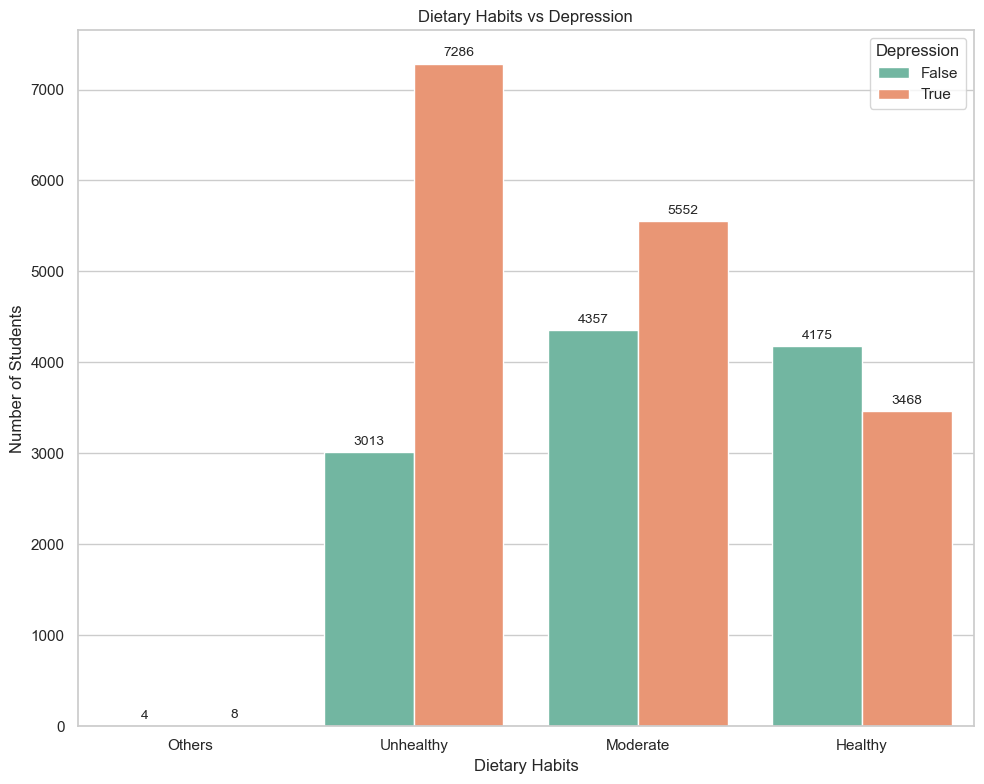

'\nOur analysis shows a clear pattern: students with unhealthy diets are significantly more likely to experience depression. In contrast, those with healthy eating habits show lower depression rates. These findings suggest that dietary interventions — even simple ones — could be a powerful lever for improving student mental health. While moderate diets offer some benefit, the data highlights the importance of consistent, nutritious eating'

In [4]:
grouped = df.groupby(['Dietary_Habits', 'Depression']).size().reset_index(name='count')
print(grouped)

plt.figure(figsize=(10, 8))
axos = sns.barplot(
    data=grouped,
    x='Dietary_Habits',
    y='count',
    hue='Depression',
    palette='Set2',
    order=['Others','Unhealthy', 'Moderate', 'Healthy'] 
)
#axos-> matplotlib axes object, represting your plot
#axos.cointainer : list of all the bar groupsJ(pathches) in plot
# plt.yscale('log')
plt.title('Dietary Habits vs Depression')
plt.xlabel('Dietary Habits')
plt.ylabel('Number of Students')
plt.legend(title='Depression')
plt.tight_layout()


for container in axos.containers:
    axos.bar_label(container, fmt='%d', label_type='edge', padding=3,fontsize=10)

plt.show()
'''
Our analysis shows a clear pattern: students with unhealthy diets are significantly more likely to experience depression. In contrast, those with healthy eating habits show lower depression rates. These findings suggest that dietary interventions — even simple ones — could be a powerful lever for improving student mental health. While moderate diets offer some benefit, the data highlights the importance of consistent, nutritious eating'''

In [5]:
# # Filter only healthy eaters
# healthy = df[df['Dietary_Habits'] == 'Healthy']
# counts = healthy['Depression'].value_counts()

# # Plot
# plt.figure(figsize=(6, 6))
# plt.pie(counts, labels=['No Depression', 'Depression'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
# plt.title('Mental Health Among Healthy Eaters')
# plt.show()


Depression vs Academic Performance

   Depression  CGPA
0       False  7.62
1        True  7.68


C:\Users\Naisarg\AppData\Local\Temp\ipykernel_32756\1210623530.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=cgpa_depression, x="Depression", y="CGPA", palette="coolwarm")


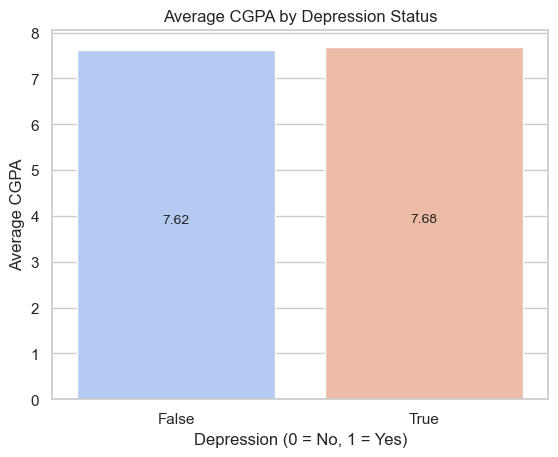

'\n- This challenges the common assumption that depression always correlates with lower academic performance.\n- Possible explanations:\n    - **High-achieving students may be under more pressure**, leading to burnout or emotional strain.\n    - **Perfectionism or overcommitment** could drive both high grades and mental health struggles.\n    - Students with depression might be **compensating academically** while struggling emotionally.'

In [6]:
cgpa_depression = df.groupby("Depression")["CGPA"].mean().round(2).reset_index()
print(cgpa_depression)
#we used cgpa in square to telling all calculating happing only on cgpa

#by defualtl group by set the grouopping column depression as index so (next)
#reset_index() : convert back into rgular column , resuit is enat on
#groupping column : column you used groupby() to split data into group , on ex: depression is groupping column,seperate student based on wthather deprsesesd or not 
ax=sns.barplot(data=cgpa_depression, x="Depression", y="CGPA", palette="coolwarm")
plt.title("Average CGPA by Depression Status")
plt.xlabel("Depression (0 = No, 1 = Yes)")
plt.ylabel("Average CGPA")



for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', padding=3,fontsize=10)

plt.show()

'''
- This challenges the common assumption that depression always correlates with lower academic performance.
- Possible explanations:
    - **High-achieving students may be under more pressure**, leading to burnout or emotional strain.
    - **Perfectionism or overcommitment** could drive both high grades and mental health struggles.
    - Students with depression might be **compensating academically** while struggling emotionally.'''


In [7]:
# # Healthy Diet and No Depression Pie Chart
# healthy_no_depression = df[(df["Dietary_Habits"] == "Healthy") & (df["Depression"] == 0)]
# count = healthy_no_depression.shape[0]
# total = df[df["Depression"] == 0].shape[0]

# labels = ["Healthy Diet & No Depression", "Others"] 
# sizes = [count, total - count]
# colors = ["#66b3ff", "#ff9999"]

# plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
# plt.title("Healthy Diet Among Non-Depressed Students")
# plt.axis("equal")
# plt.show()


Study Satisfaction by Dietary Habit

Dietary_Habits
Moderate     2.92
Unhealthy    2.93
Healthy      3.00
Others       3.42
Name: Study_Satisfaction, dtype: float64


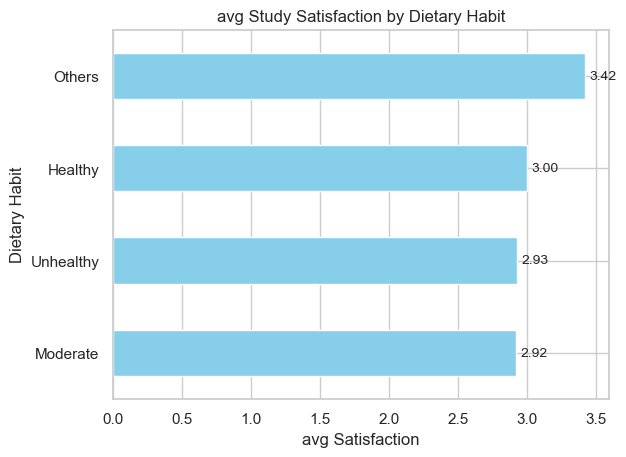

In [8]:
satisfaction_by_diet = df.groupby("Dietary_Habits")["Study_Satisfaction"].mean().sort_values().round(2)
print(satisfaction_by_diet)

x=satisfaction_by_diet.plot(kind="barh", color="skyblue")
#kind: tell pandas to whcih type of plot to create : barh : horizontal bar chart
#can be used : pie, bar,hist,box,kde,area
plt.title("avg Study Satisfaction by Dietary Habit")
plt.xlabel("avg Satisfaction")
plt.ylabel("Dietary Habit")


for container in x.containers:
    x.bar_label(container, fmt='%.2f', label_type='edge', padding=3,fontsize=10)
'''
interestingly, students with balanced diets also reported higher study satisfaction. This suggests that nutrition may influence not just mood, but motivation and engagement.

- While “Healthy” diets are often assumed to boost academic engagement, your data suggests that **non-standard or personalized diets (“Others”) may be more satisfying** for some students.
- This could reflect autonomy, cultural preferences, or flexible eating routines that align better with individual needs.
- The small gap between “Healthy” and “Unhealthy” diets in satisfaction suggests that **diet alone isn’t a strong predictor**—but it may interact with other factors like sleep, stress, or family support.'''
plt.show()

Degree type and depression

      Degree  count   sum  Depression_Rate
11  Class 12   6075  4299            70.77
26    Others     35    21            60.00
0     B.Arch   1476   871            59.01
10       BSc    887   523            58.96
6        BBA    696   407            58.48
20      MBBS    696   404            58.05
25       MSc   1188   679            57.15
7        BCA   1431   817            57.09
4     B.Tech   1152   655            56.86
1      B.Com   1505   852            56.61
9        BHM    924   509            55.09
27       PhD    520   286            55.00
2       B.Ed   1863  1018            54.64
8         BE    610   331            54.26
16   M.Pharm    582   314            53.95
13       LLM    481   259            53.85
19       MBA    560   301            53.75
5         BA    596   319            53.52
21       MCA   1043   558            53.50
18        MA    544   290            53.31
14     M.Com    734   390            53.13
12       LLB    670   355            52.99
23        M

C:\Users\Naisarg\AppData\Local\Temp\ipykernel_32756\2214859994.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=degree_counts, x="Depression_Rate", y="Degree", palette="viridis")


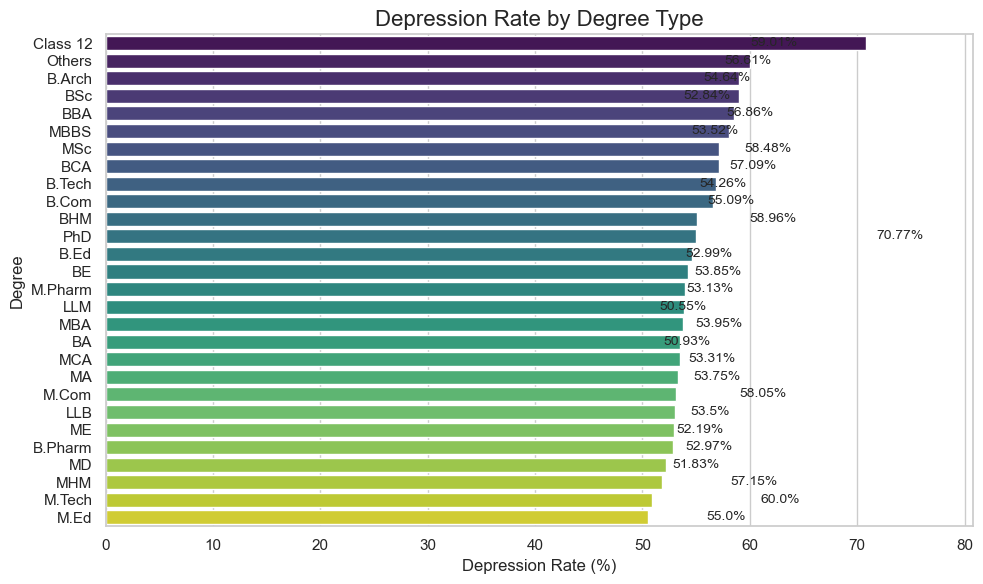

'\nClass 12 students show the highest depression rate (70.8%), likely due to intense academic pressure, competitive exams, and transitional stress.\n\n- **Professional degrees** like **Architecture (B.Arch)**, **Science (BSc)**, **MBBS**, and **Engineering (B.Tech, BE)** also show elevated rates (56–59%), suggesting high workload and performance expectations.\n\n- **Postgraduate degrees** like **M.Ed**, **M.Tech**, and **MHM** show the **lowest depression rates (~50%)**, possibly due to maturity, specialization, or better coping mechanisms.\n'

In [9]:
# Group and calculate depression rate
#count-. true or false not matter
#sum → sums the values treating True as 1 and False as 0.

# Example for B.Sc: True = 1, False = 0 → 1 + 0 + 1 = 2

# So sum gives the number of students with depression in that degree.
# So sum() automatically counts how many True values exist.
degree_counts = df.groupby("Degree")["Depression"].agg(["count", "sum"]).reset_index()
#
#group all student by degree and doing count how many student in degree and sum of them which have depression is true
degree_counts["Depression_Rate"] = (degree_counts["sum"] / degree_counts["count"] * 100).round(2)
#Adding new column : depressio_rate [%]
degree_counts = degree_counts.sort_values("Depression_Rate", ascending=False)
#sort with highest depuression rate 
print(degree_counts)

# Plot with horizontal bars for better readability
plt.figure(figsize=(10, 6))
sns.barplot(data=degree_counts, x="Depression_Rate", y="Degree", palette="viridis")


# Annotate values with cleaner spacing
for index, row in degree_counts.iterrows():
    plt.text(row["Depression_Rate"]+1, index, f"{row['Depression_Rate']}%", va='center', fontsize=10)
    #+1 avoid overlap
    #plt.txt(x,y,text,va,fontsize)

#index -> 0,1,2,3
#row->actual row data, mini dict



# Labels and title
plt.title("Depression Rate by Degree Type", fontsize=16)
plt.xlabel("Depression Rate (%)")
plt.ylabel("Degree")
plt.xlim(0, degree_counts["Depression_Rate"].max() + 10)
#on 70.77% show max-> so we don't want overlap that why we exetra add on x-ais
plt.tight_layout()
plt.show()

'''
plt.text()
 lets you annotate the bars with the exact number.

This makes your chart self-explanatory.

People don't have to estimate values from the axis ticks.

3Control over placement and formatting

can place the number outside the bar, above the bar, or inside the bar.

u can control font size, color, padding, etc.'''




'''
Class 12 students show the highest depression rate (70.8%), likely due to intense academic pressure, competitive exams, and transitional stress.

- **Professional degrees** like **Architecture (B.Arch)**, **Science (BSc)**, **MBBS**, and **Engineering (B.Tech, BE)** also show elevated rates (56–59%), suggesting high workload and performance expectations.

- **Postgraduate degrees** like **M.Ed**, **M.Tech**, and **MHM** show the **lowest depression rates (~50%)**, possibly due to maturity, specialization, or better coping mechanisms.
'''

In [10]:
df.columns

Index(['id', 'new_id', 'Gender', 'Age', 'City', 'Profession',
       'Academic_Pressure', 'Work_Pressure', 'CGPA', 'Study_Satisfaction',
       'Job_Satisfaction', 'Sleep_Duration', 'Dietary_Habits', 'Degree',
       'Have_you_ever_had_suicidal_thoughts', 'Work_Study_Hours',
       'Financial_Stress', 'Family_History_of_Mental_Illness', 'Depression',
       'Job_Satisfactionn'],
      dtype='object')

In [11]:
df

,id,new_id,Gender,Age,City,Profession,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Have_you_ever_had_suicidal_thoughts,Work_Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression,Job_Satisfactionn
0,2,1,Male,33,Visakhapatnam,Student,5,0,8.97,2,0.0,5.5,Healthy,B.Pharm,True,3,1,False,True,0
1,8,2,Female,24,Bangalore,Student,2,0,5.90,5,0.0,5.5,Moderate,BSc,False,3,2,True,False,0
2,26,3,Male,31,Srinagar,Student,3,0,7.03,5,0.0,4.0,Healthy,BA,False,9,1,True,False,0
3,30,4,Female,28,Varanasi,Student,3,0,5.59,2,0.0,7.5,Moderate,BCA,True,4,5,True,True,0
4,32,5,Female,25,Jaipur,Student,4,0,8.13,3,0.0,5.5,Moderate,M.Tech,True,1,1,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27858,140685,27897,Female,27,Surat,Student,5,0,5.75,5,0.0,5.5,Unhealthy,Class 12,True,7,1,True,False,0
27859,140686,27898,Male,27,Ludhiana,Student,2,0,9.40,3,0.0,4.0,Healthy,MSc,False,0,3,True,False,0
27860,140689,27899,Male,31,Faridabad,Student,3,0,6.61,4,0.0,5.5,Unhealthy,MD,False,12,2,False,False,0
27861,140690,27900,Female,18,Ludhiana,Student,5,0,6.88,2,0.0,4.0,Healthy,Class 12,True,10,5,False,True,0


CGPA by sleep duration & depression status

                No Depression  Depression
Sleep_Duration                           
4.0                      7.61        7.65
5.5                      7.64        7.72
7.5                      7.64        7.72
9.0                      7.57        7.64


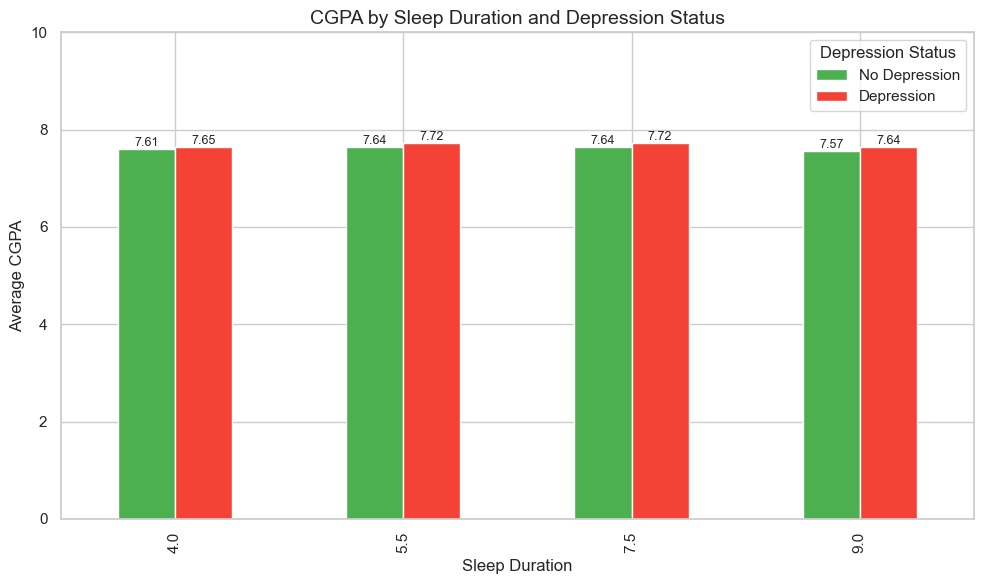

'- This pattern suggests that **academic performance may not immediately reflect emotional distress**.\n- Students with depression might be **overcompensating academically**, possibly driven by pressure, perfectionism, or fear of failure.\n- The lack of CGPA decline despite low sleep and depression could indicate **unsustainable effort** or **hidden burnout**.'

In [12]:
pivot_df = pd.pivot_table(df, values="CGPA", index="Sleep_Duration", columns="Depression", aggfunc="mean").round(2)
# Renameing columns for clarity
pivot_df.columns = ["No Depression", "Depression"]
print(pivot_df)

ax=pivot_df.plot(kind="bar", figsize=(10, 6), color=["#4caf50", "#f44336"])

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=9)

plt.title("CGPA by Sleep Duration and Depression Status", fontsize=14)
plt.xlabel("Sleep Duration")
plt.ylabel("Average CGPA")
plt.legend(title="Depression Status")
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

'''- This pattern suggests that **academic performance may not immediately reflect emotional distress**.
- Students with depression might be **overcompensating academically**, possibly driven by pressure, perfectionism, or fear of failure.
- The lack of CGPA decline despite low sleep and depression could indicate **unsustainable effort** or **hidden burnout**.'''

In [13]:
df.columns

Index(['id', 'new_id', 'Gender', 'Age', 'City', 'Profession',
       'Academic_Pressure', 'Work_Pressure', 'CGPA', 'Study_Satisfaction',
       'Job_Satisfaction', 'Sleep_Duration', 'Dietary_Habits', 'Degree',
       'Have_you_ever_had_suicidal_thoughts', 'Work_Study_Hours',
       'Financial_Stress', 'Family_History_of_Mental_Illness', 'Depression',
       'Job_Satisfactionn'],
      dtype='object')

In [14]:
# Filteringrows where degree is Class 12  &&&  &&&& depression = 1  &&& suicidal thoughts = 1
filtered = df[
    (df['Degree'] == 'Class 12') &
    (df['Depression'] == 1) &
    (df['Have_you_ever_had_suicidal_thoughts'] == 1)
]


# Group by gender and count
result = filtered.groupby('Gender')['id'].count().reset_index(name='Student_Count')
#filter data by group by ex: male,female
#id count_> how many student in each group 
#resseting index -> convert the result back to a dataframe and names thhe student ocunt 
print(result)

   Gender  Student_Count
0  Female           1642
1    Male           1993


Axes(0.125,0.11;0.775x0.77)


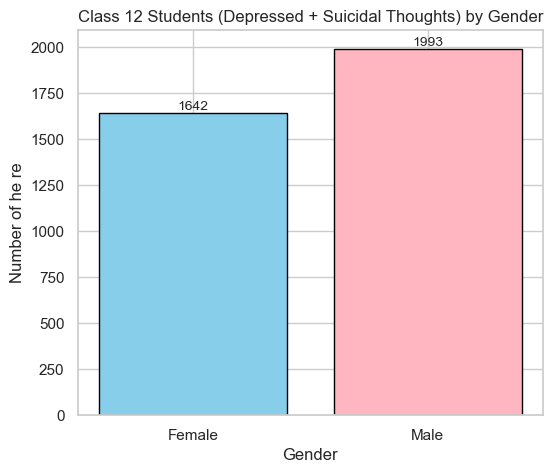

'In Class 12, 1,993 male and 1,642 female students reported both depression and suicidal thoughts. This indicates a significant mental health concern, with male students showing a slightly higher tendency. The result suggests a need for targeted counselling and stress-management programs, especially during exam seasons.'

In [15]:
plt.figure(figsize=(6,5))
bars=plt.bar(result['Gender'], result['Student_Count'], color=['#87CEEB', '#FFB6C1'], edgecolor='black')

plt.title('Class 12 Students (Depressed + Suicidal Thoughts) by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of he re')


ax = plt.gca() #getting crurent axes
print(ax)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10)

plt.show()
'''In Class 12, 1,993 male and 1,642 female students reported both depression and suicidal thoughts. This indicates a significant mental health concern, with male students showing a slightly higher tendency. The result suggests a need for targeted counselling and stress-management programs, especially during exam seasons.'''

C:\Users\Naisarg\AppData\Local\Temp\ipykernel_32756\4058334479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


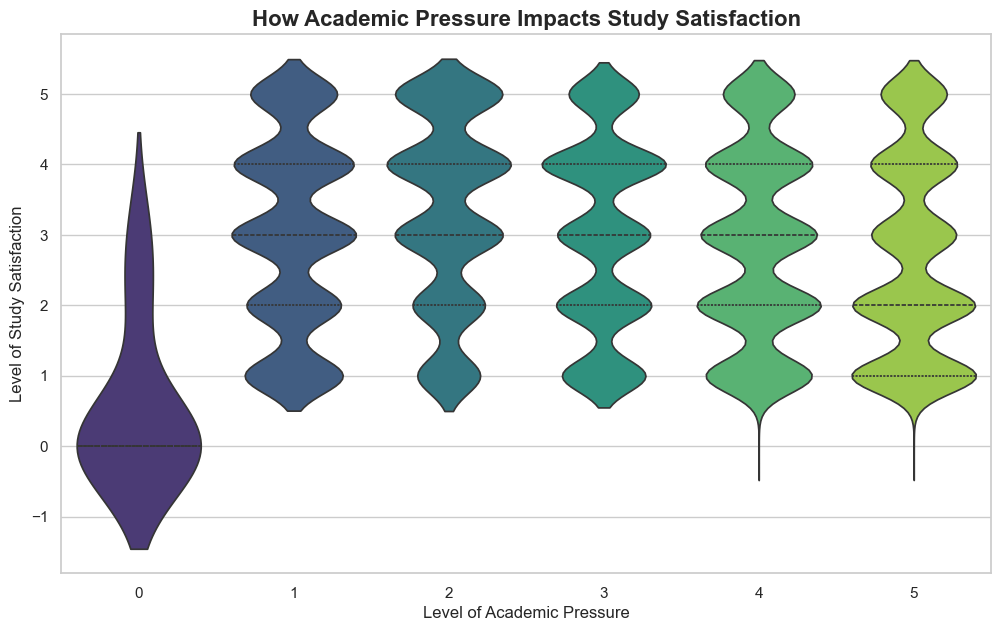

In [ ]:
plt.figure(figsize=(12, 7))
sns.violinplot(
    x='Academic_Pressure',
    y='Study_Satisfaction',
    data=df,
    palette='viridis',  
    inner='quartile' # Shows the quartiles inside the violins
)

plt.title('How Academic Pressure Impacts Study Satisfaction', fontsize=16, fontweight='bold')
plt.xlabel('Level of Academic Pressure', fontsize=12)
plt.ylabel('Level of Study Satisfaction', fontsize=12)
plt.show()


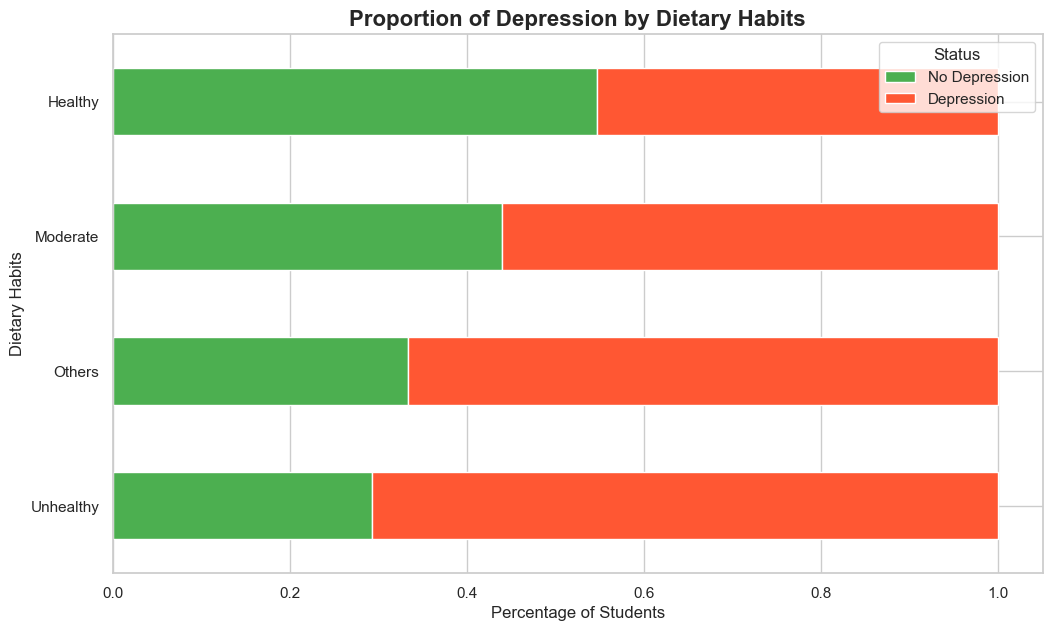

In [ ]:

diet_depression = pd.crosstab(df['Dietary_Habits'], df['Depression'])


diet_depression_percentage = diet_depression.div(diet_depression.sum(1).astype(float), axis=0)

diet_depression_percentage.plot(
    kind='barh', 
    stacked=True,
    figsize=(12, 7),
    color=['#4CAF50', '#FF5733'] )

plt.title('Proportion of Depression by Dietary Habits', fontsize=16, fontweight='bold')
plt.xlabel('Percentage of Students', fontsize=12)
plt.ylabel('Dietary Habits', fontsize=12)
plt.legend(['No Depression', 'Depression'], title='Status')
plt.gca().invert_yaxis() 
plt.show()


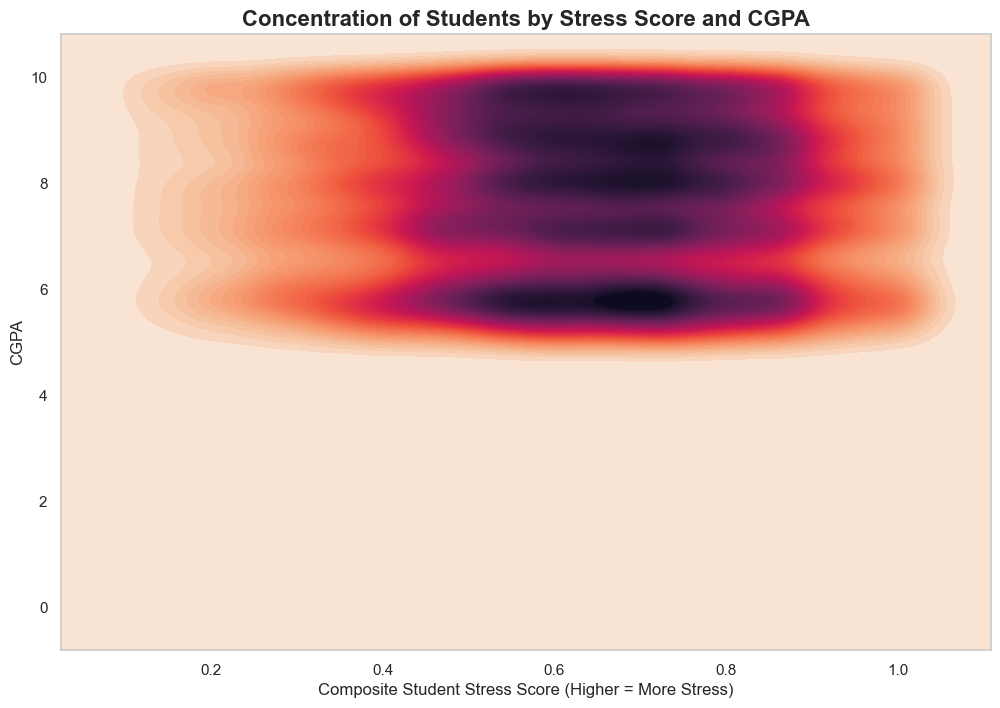

In [ ]:


sns.set_style("whitegrid")

df['normalized_academic_pressure'] = df['Academic Pressure'] / df['Academic Pressure'].max()
df['normalized_financial_stress'] = df['Financial Stress'] / df['Financial Stress'].max()


sleep_mapping = {
    'Less than 5 hours': 3,  
    '5.5': 2,
    '4.0': 2,
    '7.5': 1,
    '9.0': 0   
}
df['sleep_stress_score'] = df['Sleep Duration'].astype(str).map(sleep_mapping).fillna(1)
df['normalized_sleep_stress'] = df['sleep_stress_score'] / df['sleep_stress_score'].max()

df['Stress Score'] = (df['normalized_academic_pressure'] +
                      df['normalized_financial_stress'] +
                      df['normalized_sleep_stress']) / 3

plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=df,
    x='Stress Score',
    y='CGPA',
    fill=True,
    thresh=0,
    levels=100,
    cmap="rocket_r"  
)

plt.title('Concentration of Students by Stress Score and CGPA', fontsize=16, fontweight='bold')
plt.xlabel('Composite Student Stress Score (Higher = More Stress)', fontsize=12)
plt.ylabel('CGPA', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
